In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout




# Dataset Loading and Exploration

In [2]:
dataset = pd.read_csv('/content/AirPassengers.csv')

In [3]:
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
dataset.describe

<bound method NDFrame.describe of        Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]>

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
dataset.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [7]:
#Conerting datatype month from integer to datetime

dataset['Month'] = pd.to_datetime(dataset['Month'])

# Exploratory Data Analysis

In [8]:
# Using plotly.express
import plotly.express as px

#df = px.data.stocks()

fig = px.line(dataset, x='Month', y="#Passengers")
fig.show()

**From this graph we can say that during from May to July. After july it has started decreasing**

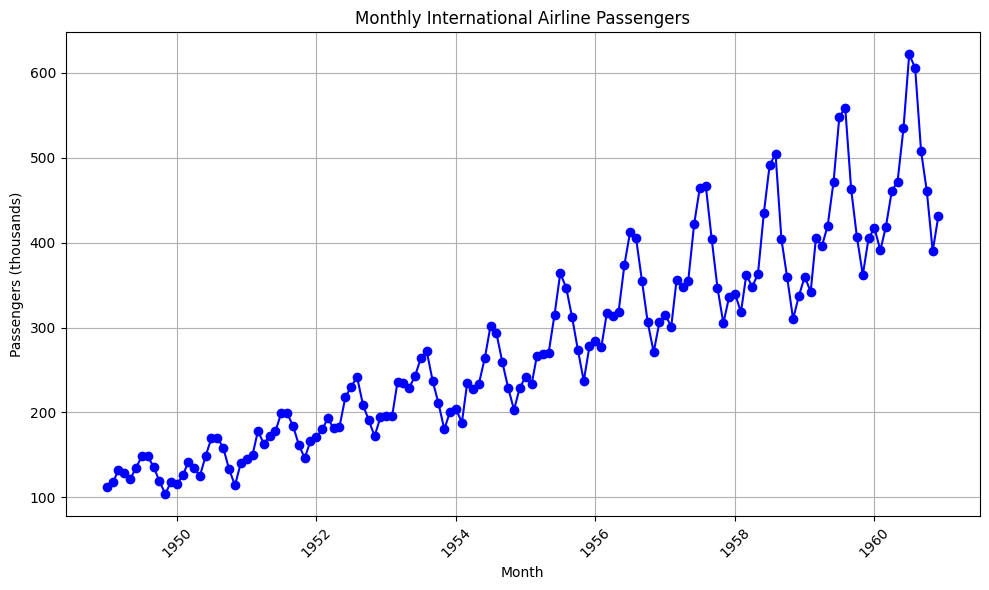

In [9]:
#Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(dataset["Month"], dataset["#Passengers"], marker='o', linestyle='-', color='b')
plt.title('Monthly International Airline Passengers')
plt.xlabel('Month')
plt.ylabel('Passengers (thousands)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

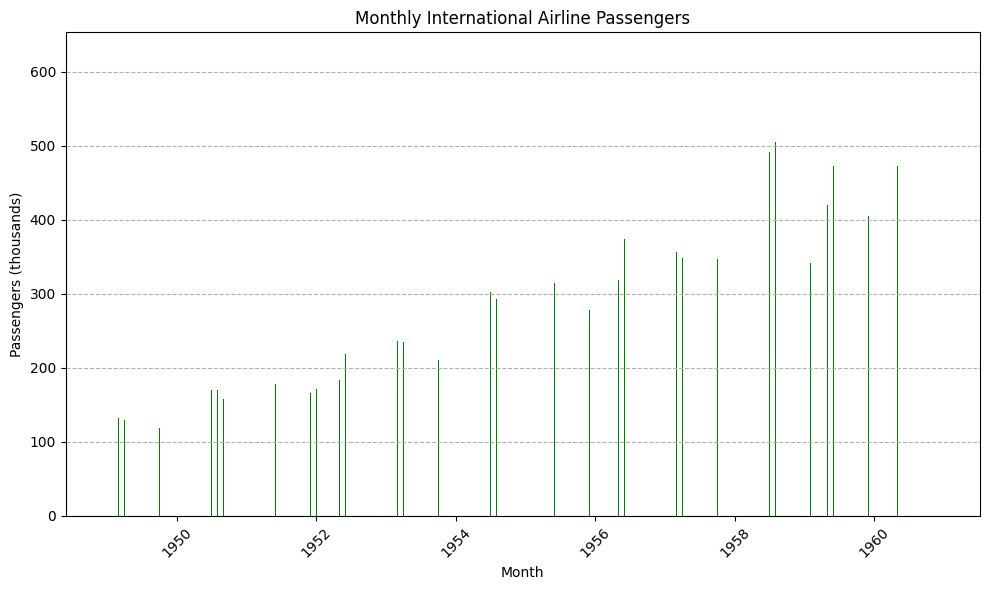

In [10]:
# Create a bar graph

plt.figure(figsize=(10, 6))
plt.bar(dataset["Month"], dataset["#Passengers"], color='g', width = 1)
plt.title('Monthly International Airline Passengers')
plt.xlabel('Month')
plt.ylabel('Passengers (thousands)')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Data Preprocessing and training

In [11]:
scaler = MinMaxScaler()
dataset["#Passengers"] = scaler.fit_transform(dataset["#Passengers"].values.reshape(-1,1))

In [12]:
train_start_date = '1949-01-01'
train_end_date = '1958-12-31'
test_start_date = '1959-01-01'
test_end_date = '1960-12-31'
train_data = dataset[(dataset['Month'] >= train_start_date) & (dataset['Month'] <= train_end_date)]
test_data = dataset[(dataset['Month'] >= test_start_date) & (dataset['Month'] <= test_end_date)]

train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [13]:
def create_supervised_data(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

look_back = 10
X, y = create_supervised_data(dataset['#Passengers'].values, look_back)

In [14]:
train_size = int(len(X) * 0.9)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [15]:
train_data

,Month,#Passengers
0,1949-01-01,0.015444
1,1949-02-01,0.027027
2,1949-03-01,0.054054
3,1949-04-01,0.048263
4,1949-05-01,0.032819
...,...,...
115,1958-08-01,0.774131
116,1958-09-01,0.579151
117,1958-10-01,0.492278
118,1958-11-01,0.397683


In [16]:
test_data

,Month,#Passengers
0,1959-01-01,0.494208
1,1959-02-01,0.459459
2,1959-03-01,0.583012
3,1959-04-01,0.563707
4,1959-05-01,0.610039
5,1959-06-01,0.710425
6,1959-07-01,0.857143
7,1959-08-01,0.878378
8,1959-09-01,0.693050
9,1959-10-01,0.584942


# Simple RNN

In [18]:
hidden_units = 64
model = Sequential()
model.add(SimpleRNN(units=hidden_units, activation='relu', input_shape=(10, 1)))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mean_squared_error', optimizer='adam')


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Log
import os
import time

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(log_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit/log_2023_11_10_02_54_50


In [20]:
from keras.callbacks import EarlyStopping
# Early stopping callback to stop training if validation loss doesn't improve for a specified number of epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



**Model Fitting**

In [21]:
from keras import callbacks
history = model.fit(X_train, y_train, epochs= 200 , batch_size= 20, validation_data=(X_test, y_test), callbacks = [early_stopping] )

Epoch 1/200
6/6 [==============================] - 1s 41ms/step - loss: 0.0892 - val_loss: 0.1156
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0224 - val_loss: 0.0314
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0211 - val_loss: 0.0238
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0130 - val_loss: 0.0335
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0142 - val_loss: 0.0262
Epoch 6/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0075 - val_loss: 0.0176
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0108 - val_loss: 0.0149
Epoch 8/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0083 - val_loss: 0.0158
Epoch 9/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0093 - val_loss: 0.0166
Epoch 10/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0106 - val_loss: 0.0146
Epoch 11/200
6/6 [==========

# Save The Model

In [22]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

# Model checkpoint callback to save the model with the lowest validation loss
model_checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True)


In [23]:
import time
import os

def save_model_path(MODEL_dir = "TRAINED_MODEL"):
  os.makedirs(MODEL_dir, exist_ok= True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(MODEL_dir, fileName)
  print(f"Model {fileName} will be saved at {model_path}")
  return model_path

In [24]:
UNIQUE_PATH = save_model_path()
UNIQUE_PATH

Model Model_2023_11_10_02_56_47_.h5 will be saved at TRAINED_MODEL/Model_2023_11_10_02_56_47_.h5


'TRAINED_MODEL/Model_2023_11_10_02_56_47_.h5'

In [25]:
tf.keras.models.save_model(model, UNIQUE_PATH)

<ipython-input-25-e4cf6f9d2155>:1: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [26]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 15ms/step - loss: 0.0031


0.0030641418416053057

# Prediction

In [27]:
test_data

,Month,#Passengers
0,1959-01-01,0.494208
1,1959-02-01,0.459459
2,1959-03-01,0.583012
3,1959-04-01,0.563707
4,1959-05-01,0.610039
5,1959-06-01,0.710425
6,1959-07-01,0.857143
7,1959-08-01,0.878378
8,1959-09-01,0.693050
9,1959-10-01,0.584942


In [28]:
train_data.iloc[110:,:]

,Month,#Passengers
110,1958-03-01,0.498069
111,1958-04-01,0.471042
112,1958-05-01,0.500000
113,1958-06-01,0.638996
114,1958-07-01,0.747104
115,1958-08-01,0.774131
116,1958-09-01,0.579151
117,1958-10-01,0.492278
118,1958-11-01,0.397683
119,1958-12-01,0.449807


In [29]:
rows_to_add = train_data.iloc[110:, :]
test_data1 = pd.concat([rows_to_add, test_data], ignore_index=True)



In [30]:
test_data_input = test_data1['#Passengers'].values
dates = test_data1['Month'].iloc[look_back:]
X_test_input, y_test_input = create_supervised_data(test_data_input, look_back)
predictions = model.predict(X_test_input)

compare_df = pd.DataFrame({'Date': dates,'Actual': y_test_input, 'Predicted': predictions.flatten()})
compare_df['Actual'] = scaler.inverse_transform(compare_df['Actual'].values.reshape(-1, 1))
compare_df['Predicted'] = scaler.inverse_transform(compare_df['Predicted'].values.reshape(-1, 1))

compare_df = compare_df.reset_index(drop=True)
print(compare_df)

compare_df.to_csv('predicted_results.csv', index=False)

1/1 [==============================] - 0s 136ms/step
         Date  Actual   Predicted
0  1959-01-01   360.0  361.191650
1  1959-02-01   342.0  362.860535
2  1959-03-01   406.0  366.389465
3  1959-04-01   396.0  396.178833
4  1959-05-01   420.0  429.592224
5  1959-06-01   472.0  489.007568
6  1959-07-01   548.0  515.863647
7  1959-08-01   559.0  521.880432
8  1959-09-01   463.0  485.161224
9  1959-10-01   407.0  411.739197
10 1959-11-01   362.0  351.215149
11 1959-12-01   405.0  362.417145
12 1960-01-01   417.0  422.954346
13 1960-02-01   391.0  428.373322
14 1960-03-01   419.0  425.417206
15 1960-04-01   461.0  417.977722
16 1960-05-01   472.0  474.069794
17 1960-06-01   535.0  557.663330
18 1960-07-01   622.0  581.046204
19 1960-08-01   606.0  566.244019
20 1960-09-01   508.0  539.184509
21 1960-10-01   461.0  472.608490
22 1960-11-01   390.0  410.594025
23 1960-12-01   432.0  401.184143


In [34]:
test_data_input = test_data1['#Passengers'].values
dates = test_data1['Month'].iloc[look_back:]
X_test_input, y_test_input = create_supervised_data(test_data_input, look_back)
predictions = model.predict(X_test_input)

compare_df = pd.DataFrame({'Date': dates, '#Passangers': predictions.flatten()})

compare_df['#Passangers'] = scaler.inverse_transform(compare_df['#Passangers'].values.reshape(-1, 1))

compare_df = compare_df.reset_index(drop=True)
print(compare_df)

compare_df.to_csv('predicted1_results.csv', index=False)



1/1 [==============================] - 0s 13ms/step
         Date  #Passangers
0  1959-01-01   361.191650
1  1959-02-01   362.860535
2  1959-03-01   366.389465
3  1959-04-01   396.178833
4  1959-05-01   429.592224
5  1959-06-01   489.007568
6  1959-07-01   515.863647
7  1959-08-01   521.880432
8  1959-09-01   485.161224
9  1959-10-01   411.739197
10 1959-11-01   351.215149
11 1959-12-01   362.417145
12 1960-01-01   422.954346
13 1960-02-01   428.373322
14 1960-03-01   425.417206
15 1960-04-01   417.977722
16 1960-05-01   474.069794
17 1960-06-01   557.663330
18 1960-07-01   581.046204
19 1960-08-01   566.244019
20 1960-09-01   539.184509
21 1960-10-01   472.608490
22 1960-11-01   410.594025
23 1960-12-01   401.184143
